## Observations and Insights

In [ ]:
#There is a high correlation between weight size and tumor volume. When the mouse is small with low weight, the tumor volume is small.
#There is an outlier of tumor size in a mouse treated with Infubunol. We would need to look closer into that mouse why it had such a small tumor volume.

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_metadata_df = pd.DataFrame(mouse_metadata)
study_results_df = pd.DataFrame(study_results)
merge_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = merge_df.groupby("Drug Regimen").agg({'Tumor Volume (mm3)' : ['mean','median', 'var','std','sem']})
regimen_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots

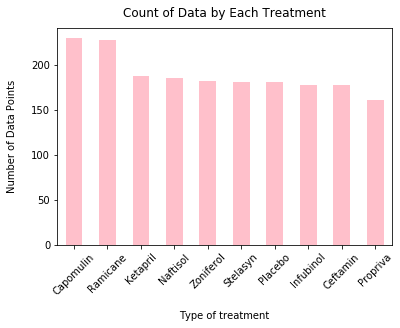

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
merge_df['Drug Regimen'].value_counts().plot(kind = 'bar', color = 'pink', rot = 45)
plt.xlabel("Type of treatment", labelpad=14)
plt.ylabel("Number of Data Points", labelpad=14)
plt.title("Count of Data by Each Treatment", y=1.02)
plt.show()

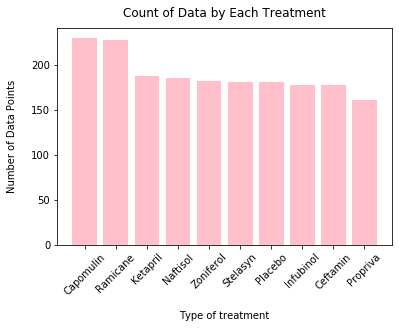

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
count = merge_df['Drug Regimen'].value_counts()
# drug_type = merge_df['Drug Regimen'].unique()

plt.bar(count.index, count.values, color ='pink')
plt.xticks(rotation = 45)
# plt.show()
plt.xlabel("Type of treatment", labelpad=14)
plt.ylabel("Number of Data Points", labelpad=14)
plt.title("Count of Data by Each Treatment", y=1.02)
plt.show()
#count.values

## Pie plots

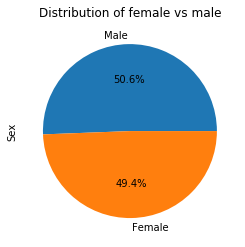

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
count = merge_df['Sex'].value_counts()
count.plot(kind = 'pie', y = 'Gender', legend = False,autopct = "%1.1f%%")
plt.title('Distribution of female vs male')
plt.show()

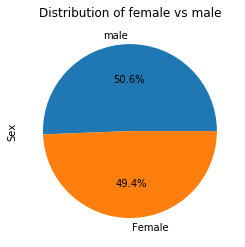

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["male","Female"]
gender_count = merge_df['Sex'].value_counts()
plt.pie(gender_count,labels = gender, autopct = "%1.1f%%")
# # plt.pie(pie_votes, explode=explode, labels=pies, colors=colors,
# #         autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Distribution of female vs male')
plt.ylabel('Sex')
plt.show()

## Quartiles, outliers and boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
best_regimes = merge_df[merge_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)
best_regimes

best_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

best_regimes_last= best_regimes_data.groupby(["Drug Regimen","Mouse ID"]).last()["Tumor Volume (mm3)"]
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
lowerq = best_regimes_last.groupby("Drug Regimen").quantile(.25)
upperq = best_regimes_last.groupby("Drug Regimen").quantile(.75)
median = best_regimes_last.groupby("Drug Regimen").quantile(.5)
iqr = upperq-lowerq

print(f"The lower quartile is:\n{lowerq}")
print(f"The upper quartile is:\n{upperq}")
print(f"The interquartile rangeis:\n{iqr}")
print(f"The the medianis:\n{median} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound}\ncould be outliers.")
print(f"Values above {upper_bound}\n could be outliers.")

The lower quartile is:
Drug Regimen
Capomulin    32.377357
Ceftamin     48.722078
Infubinol    54.048608
Ramicane     31.560470
Name: Tumor Volume (mm3), dtype: float64
The upper quartile is:
Drug Regimen
Capomulin    40.159220
Ceftamin     64.299830
Infubinol    65.525743
Ramicane     40.659006
Name: Tumor Volume (mm3), dtype: float64
The interquartile rangeis:
Drug Regimen
Capomulin     7.781863
Ceftamin     15.577752
Infubinol    11.477135
Ramicane      9.098537
Name: Tumor Volume (mm3), dtype: float64
The the medianis:
Drug Regimen
Capomulin    38.125164
Ceftamin     59.851956
Infubinol    60.165180
Ramicane     36.561652
Name: Tumor Volume (mm3), dtype: float64 
Values below Drug Regimen
Capomulin    20.704562
Ceftamin     25.355450
Infubinol    36.832905
Ramicane     17.912664
Name: Tumor Volume (mm3), dtype: float64
could be outliers.
Values above Drug Regimen
Capomulin    51.832015
Ceftamin     87.666458
Infubinol    82.741446
Ramicane     54.306811
Name: Tumor Volume (mm3), dt

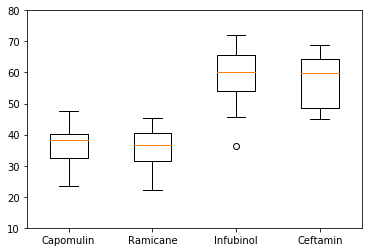

In [42]:
# Turn retrieved data into dataframe to easily manipulate
best_regimen_df = best_regimes_last.to_frame()
best_regimen_df

#Create a list to use as labels and dataframe
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
final_df = best_regimen_df.reset_index()
final_df
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

## Line and scatter plots

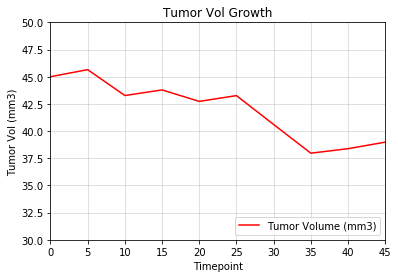

In [66]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
tumorvol_growth = merge_df[merge_df["Mouse ID"].isin(["b128"])]
tumorvol_growth

#extract necessary columns
tumorvol_growth_data = tumorvol_growth[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
#tumorvol_growth_data
plt.plot(tumorvol_growth_data['Timepoint'], tumorvol_growth_data['Tumor Volume (mm3)'], color = 'red', label = "Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Vol (mm3)")
plt.title("Tumor Vol Growth")
plt.xlim(0,45)
plt.ylim(30,50)
plt.legend(loc = "lower right")
plt.grid(alpha = 0.5)
plt.show()
# plt.plot(, dd_speed, color ="red", marker = "x", markersize = 15, linestyle = "-.",label ="Danger Drop")

# lines = line_plot_final.plot.line()

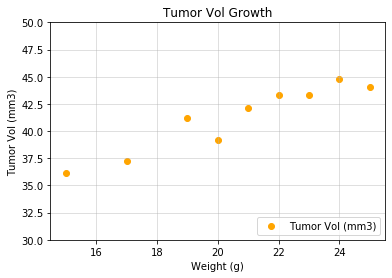

In [98]:
##Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#Extracted data on mice treated with Capolumulin
capomulin = merge_df[merge_df["Drug Regimen"].isin(["Capomulin"])]
capomulin

#extracted necessary columns and calculated average tumor volume, then put into dataframe
capomulin_df= capomulin[["Mouse ID","Weight (g)","Tumor Volume (mm3)"]]
capomulin_grouped_weight = capomulin_df.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()

#Created a scatter plot
plt.scatter(capo_grouped_plot['Weight (g)'],capo_grouped_plot['Tumor Volume (mm3)'], color = "orange", label = "Tumor Vol (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Vol (mm3)")
plt.title("Tumor Vol Growth")
plt.ylim(30,50)
plt.legend(loc = "lower right")
plt.grid(alpha = 0.5)
plt.show()
plt.show()

The r-squared is: 0.9034966277438606


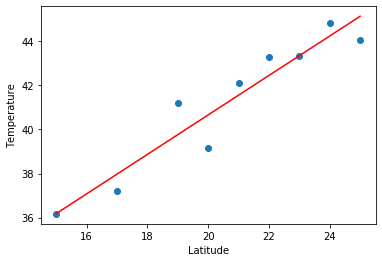

In [103]:
## Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
from scipy import stats
x_values = capo_grouped_plot['Weight (g)']
y_values = capo_grouped_plot['Tumor Volume (mm3)']
# Perform a linear regression on weight vs tumor
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()